In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
using LinearAlgebra
using Plots

    Updating registry at `C:\Users\tamar\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\tamar\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\tamar\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\tamar\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\tamar\.julia\environments\v1.8\Manifest.toml`


In [2]:
function polynomial_interpolation(f,n)
    x = [-1 + (j/n) for j in 0:2n]
    A = hcat([x.^ k for k in 0:2n]...)
    coeffs = A \ f.(x)
    calculate_polynomial(x) = sum(c * x.^(k) for (c,k) in zip(coeffs,0:2n))
    x_inter = -1:0.01:1
    y_inter = calculate_polynomial(x_inter)
    plot!(x_inter, y_inter, label="Interpolation for n=$n")
end


polynomial_interpolation (generic function with 1 method)

$P_n$ has degree $2n$
$\Rightarrow P_n(x) = a_0 + a_1x + \ldots + a_{2n}x^{2n}$

Build a Vandermonde matrix $A = 
\begin{pmatrix}
      1       & x_{0} & x_{0}^{2} & \dots & x_{0}^{2n} \\ 
      1       & x_{1} & x_{1}^{2} & \dots & x_{1}^{2n} \\
      \vdots  & \vdots&  \vdots   &       & \vdots    \\
      1       & x_{2n} & x_{2n}^{2} & \dots & x_{2n}^{2n} \\ 
    \end{pmatrix}$
    
$A$ has $2n+1$ rows (for every $x_n$)


Now , 
$\begin{pmatrix}
1       & x_{0} & x_{0}^{2} & \dots & x_{0}^{2n} \\ 
1       & x_{1} & x_{1}^{2} & \dots & x_{1}^{2n} \\
\vdots  & \vdots&  \vdots   &       & \vdots    \\
1       & x_{2n} & x_{2n}^{2} & \dots & x_{2n}^{2n} \\ 
\end{pmatrix}\begin{pmatrix} a_0 \\ a_1 \\ \vdots \\ a_{2n} \end{pmatrix}$
$=\begin{pmatrix} a_0 + a_1x_0 + \ldots + a_{2n}x_0^{2n} \\ a_0 + a_1x_1 + \ldots + a_{2n}x_1^{2n} \\ \vdots \\ a_0 + a_1x_{2n} + \ldots + a_{2n}x_{2n}^{2n} \end{pmatrix} $ 
$= \begin{pmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_{2n}) \end{pmatrix}$
$= \begin{pmatrix} P_n(x_0) \\ P_n(x_1) \\ \vdots \\ P_n(x_{2n}) \end{pmatrix}$


So, we can calculate the vector $\begin{pmatrix} a_0 \\ a_1 \\ \vdots \\ a_{2n} \end{pmatrix} \Rightarrow$ The coefficients of $P_n$ can be calculated

After calculating the polynomial $P_n$, its value can be calculated in the range $[-1,1]$. Now we can plot $P_n$




In [3]:
function task_1(f)
    polynomial_interpolation(f,3)
    polynomial_interpolation(f,4)
    polynomial_interpolation(f,5)
    polynomial_interpolation(f,6)
end

task_1 (generic function with 1 method)

In [4]:
function task_1_1()
    x = -1:0.01:1
    f(x) = -1<=x<=0 ? 1+x : 1-x
    plot(x,f.(x) , label="Original function")
    task_1(f)
end

function task_1_2()
    x = -1:0.01:1
    f(x) = 1/(1+25x^2)
    plot(x,f.(x) , label="Original function")
    task_1(f)
end


task_1_2 (generic function with 1 method)

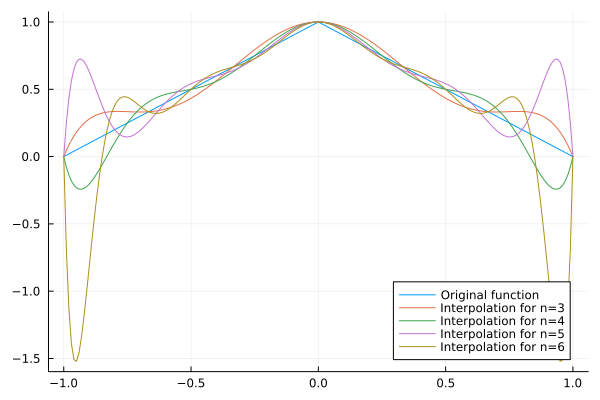

In [5]:
task_1_1()

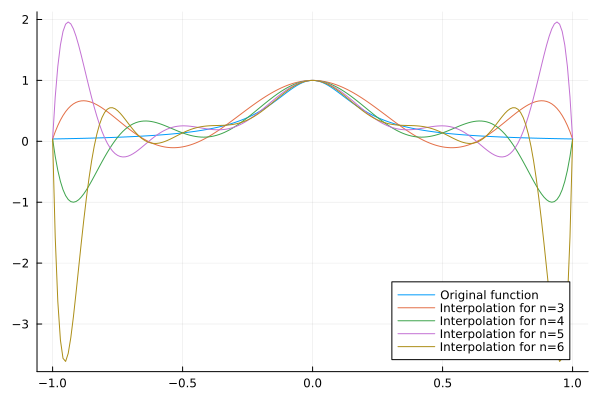

In [6]:
task_1_2()